In [1]:
import pandas as pd
import numpy as np
from pandasql import sqldf
import warnings
warnings.filterwarnings('ignore')

import ipywidgets as widgets
from ipywidgets import HBox, VBox
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

from collections import Counter 

df = pd.read_csv('DataAnalyst.csv')
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


## Vamos a eliminar nulos

In [2]:
df = df.dropna()
df = df.replace(-1,np.nan)
df = df.replace(-1.0,np.nan)
df = df.replace('-1',np.nan)
new=df["Salary Estimate"].str.split(" ", n = 1, expand = True)
sal_range=new[0].str.split('-',n=1,expand=True)
df['salary_estimate_l1'] = sal_range[0]
df['salary_estimate_l2'] = sal_range[1]

df['salary_estimate_l1']=df['salary_estimate_l1'].str.replace('K','000')
df['salary_estimate_l1']=df['salary_estimate_l1'].str.replace('$','')
df['salary_estimate_l1'] = df['salary_estimate_l1'].fillna(0)
df['salary_estimate_l1']=df['salary_estimate_l1'].astype(str).astype(int)
df['salary_estimate_l2']=df['salary_estimate_l2'].str.replace('K','000')
df['salary_estimate_l2']=df['salary_estimate_l2'].str.replace('$','')
df['salary_estimate_l2'] = df['salary_estimate_l2'].fillna(0)
df['salary_estimate_l2']=df['salary_estimate_l2'].astype(str).astype(int)
df_new = df.rename(columns={'Job Title': 'job_title',
                                'Job Description' : 'job_description',
                                'Rating' : 'rating',
                                'Company Name' : 'company_name',
                                'Company Name' : 'company_name',
                                'Location' : 'location',
                                'Company Name' : 'company_name',
                                'Headquarters' : 'headquarters',
                                'Size' : 'size',
                                'Founded' : 'founded',
                                'Type of ownership' : 'type_ownership',
                                'Industry' : 'industry',
                                'Sector' : 'sector',
                                'Revenue' : 'revenue',
                                'Competitors' : 'competitors',
                                'Easy Apply' : 'easy_apply',
                                } )
df_new.drop(['Salary Estimate'], axis = 1, inplace = True)
df_new['Job Title'], df_new['Department'] = df_new['job_title'].str.split(',', 1).str
df_new['Easy Apply'] = df_new['easy_apply'].fillna(False).astype(bool)
df_new.head()

,Unnamed: 0,job_title,job_description,rating,company_name,location,headquarters,size,founded,type_ownership,industry,sector,revenue,competitors,easy_apply,salary_estimate_l1,salary_estimate_l2,Job Title,Department,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True,37000,66000,Data Analyst,Center on Immigration and Justice (CIJ),True
1,1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,NaN,37000,66000,Quality Data Analyst,NaN,False
2,2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,NaN,37000,66000,Senior Data Analyst,Insights & Analytics Team [Customer Operations],False
3,3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,NaN,37000,66000,Data Analyst,NaN,False
4,4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,37000,66000,Reporting Data Analyst,NaN,True


## Vamos a eliminar columnas que no necesitamos

In [3]:
df_new.drop(['competitors'], axis = 1, inplace = True)
df_new.drop(['size'], axis = 1, inplace = True)
df_new.drop(['founded'], axis = 1, inplace = True)
df_new.drop(['type_ownership'], axis = 1, inplace = True)
df_new.drop(['sector'], axis = 1, inplace = True)
df_new.drop(['revenue'], axis = 1, inplace = True)
df_new.drop(['Department'], axis = 1, inplace = True)
df_new.drop(df.columns[0], axis = 1, inplace = True)
df_new.drop(['headquarters'], axis = 1, inplace = True)
df_new.drop(['industry'], axis = 1, inplace = True)
df_new.drop(['Job Title'], axis = 1, inplace = True)
df_new.drop(['easy_apply'], axis = 1, inplace = True)
print(df_new.size)
df_new.head()

18016


,job_title,job_description,rating,company_name,location,salary_estimate_l1,salary_estimate_l2,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY",37000,66000,True
1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY",37000,66000,False
2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY",37000,66000,False
3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY",37000,66000,False
4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY",37000,66000,True


## Vamos a filtrar por salarios

In [4]:
range_slider = widgets.FloatRangeSlider(
    value=[0., +100.],
    min=10., max=+150., step=5,
    description='\$ - $$$:',
    readout_format='.1f',
)

### Selecciona tu salario

In [5]:
range_slider

FloatRangeSlider(value=(10.0, 100.0), description='\\$ - $$$:', max=150.0, min=10.0, readout_format='.1f', ste…

In [210]:
x,y = range_slider.value
a = int(x*1000)
b = int(y*1000)
rango = b-a
df_final1 = df_new.drop(df_new[df_new['salary_estimate_l1'] <= a].index)
df_final2 = df_new.drop(df_new[df_new['salary_estimate_l2'] <= (a+rango)].index)

df_salary = pd.concat([df_final1,df_final2]).drop_duplicates(keep=False)

#df_end = pd.concat([df_final1,df_final2]).drop_duplicates(keep=False)
df_salary.head()

,job_title,job_description,rating,company_name,location,salary_estimate_l1,salary_estimate_l2,Easy Apply
30,Data Analyst,Our Mission\n\nMove people.\n\nOur Values\n\nW...,3.6,Revel\n3.6,"Brooklyn, NY",46000,87000,True
31,Data Analyst,"Data Analyst Jersey City, NJ 12+ months contra...",3.6,NALLAS CORPORATION\n3.6,"Jersey City, NJ",46000,87000,False
32,Data Analyst,Job Description:\nLegal experience is required...,3.5,Pozent\n3.5,"New York, NY",46000,87000,False
33,"Data Science Analyst, Capital Markets",Who we are\n\nSoFi is a digital personal finan...,3.2,SoFi\n3.2,"New York, NY",46000,87000,False
34,Data Analyst (Games),Carry1st is the leading mobile game publisher ...,NaN,Carry1st,"New York, NY",46000,87000,False


# Vamos a implementar una calificacion en la vacante
### Evaluacion
Evaluaremos 3 parametros para la darle peso a cada columna
+ Promedio de salario
+ Rating de la compañia
+ Facilidad de aplicación (Menor peso debido a dataset)

In [211]:
df_fun = df_salary
df_fun.rating = df_fun.rating.fillna(1)
col = df_fun.loc[: , "salary_estimate_l1":"salary_estimate_l2"]
df_fun['salary_mean'] = col.mean(axis=1)

## Pesos y ESTRELLAS

In [214]:
df_fun['rating_val'] = df_fun['rating']*0.1
df_fun['salary_mean_val'] = df_fun['salary_mean']*((1/10000000)*(4**3))
df_fun['ESTRELLAS'] = round(((df_fun['salary_mean_val'] + df_fun['rating_val'])/.255),1)

#DATASET ORDENADO POR ESTRELLAS
df_fun_s = df_fun.sort_values('ESTRELLAS', ascending = False)
df_fun_s.drop(['Easy Apply'], axis = 1, inplace = True)
#df_fun_s.drop(['salary_mean'], axis = 1, inplace = True)
df_fun_s.drop(['rating_val'], axis = 1, inplace = True)
df_fun_s.drop(['salary_mean_val'], axis = 1, inplace = True)
df_fun_s

,job_title,job_description,rating,company_name,location,salary_estimate_l1,salary_estimate_l2,salary_mean,ESTRELLAS
1294,Data Analyst Junior,Job Description\nJob description\nInterpret da...,5.0,"Staffigo Technical Services, LLC\n5.0","San Diego, CA",60000,124000,92000.0,4.3
1306,Sr. Data Governance Analyst,Important note regarding current health crisis...,4.9,The Carrera Agency\n4.9,"San Diego, CA",60000,124000,92000.0,4.2
206,Senior Data Analyst (6-12 Month Contract-Remote),Vistrada is looking to hire a Senior Data Anal...,5.0,VISTRADA\n5.0,"New York, NY",60000,110000,85000.0,4.1
1283,Sr. Data Analyst,"At Housecall Pro, we're focused on making the ...",4.6,Housecall Pro\n4.6,"San Diego, CA",60000,124000,92000.0,4.1
1298,Molecular Researcher and Data Analyst,This is a UC San Diego Internal Recruitment op...,4.3,UC San Diego\n4.3,"San Diego, CA",60000,124000,92000.0,4.0
...,...,...,...,...,...,...,...,...,...
1739,ACA - Data Analyst,Data Analyst\n\nThe Data Analyst position is r...,1.0,Medical Cost Containment Services Inc.,"Jacksonville, FL",40000,72000,56000.0,1.8
327,"Analyst, People Operations & HR Data","Job Description\nAt Lacoste, we think Life is ...",1.0,LACOSTE CORPORATE,"New York, NY",42000,74000,58000.0,1.8
330,Business Data Analyst (Financial Services),Business Data Analyst (Financial Services)\nTh...,1.0,The Enosys Group LLC,"New York, NY",42000,74000,58000.0,1.8
1881,Big data analyst,"Our Client, FORTUNE® 50 home improvement compa...",1.0,dataBridge,"Charlotte, NC",40000,74000,57000.0,1.8


# Haremos unas cuantas busquedas

In [243]:
not_now = df_fun_s[["job_title","job_description","ESTRELLAS", 'salary_mean']]
title_textbox = widgets.Text(
    value='',
    description='Busqueda:',
)
title_textbox

Text(value='', description='Busqueda:')

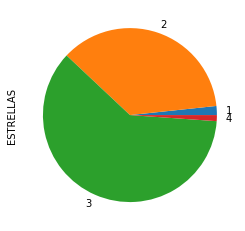

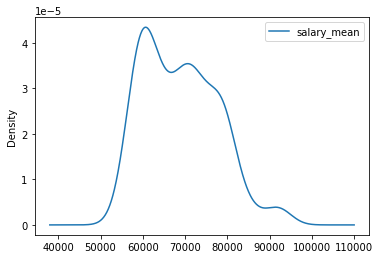

In [244]:
not_now['job_description'] = not_now['job_description']
not_now['joined_search'] = not_now['job_title'].str.lower() + str(" ") + not_now['job_description'].str.lower()
busqueda = title_textbox.value
not_now = not_now[not_now['joined_search'].str.contains(busqueda)]
not_now["ESTRELLAS"] = not_now["ESTRELLAS"].astype(dtype = int)
graph_estrella = not_now["ESTRELLAS"].value_counts()
graph_estrella = graph_estrella.sort_index()
graph_estrella.plot.pie()
graph_salario = not_now[['salary_mean',"ESTRELLAS"]]
graph_salario = graph_salario.sort_values(by =  'salary_mean')
graph_salario.plot.kde(x='ESTRELLAS', y = 'salary_mean')